## Multiple revolutions on Lambert's problem

After the implementation of Izzo's algorithm in *poliastro*, it is possible to solve the Lambert's
problem with a multiple revolution solution. Let us remember first what is this problem about and which
applications does it have.

Lambert problem tries to solve the orbit that passes trhough $\vec{r_{0}}$ and $\vec{r_{f}}$ being given an amount of time usually denoted by $\Delta t$. This can be used to solve for interplanetary flights, for example if we know the position of Earth at $t_{0}$ and the position of Mars at time $t_{f}$ we can solve for the orbit that we must follow in order to get to the red planet.

### What are multiple revolutions and why do we care about them?

The basic Lambert algorithm looks for a direc transfer, which can be be a short or long arc transfer as stated by the figure. There exist a total of three orbit solutions defined by the location of the focus for those transfer orbits:

1. **Minimum-energy orbit**: also called the optimal path. In this case the focus lies in the line that conects $\vec{r_{1}}$ and $\vec{r_{2}}$.
2. **Short arc orbit**: both focis $F_{1}$ and $F_{2}^{*}$ of the transfer orbit lie in the same side of the line connecting both position vectors.
3. **Long arc orbit**: each one of the transfer orbit focus lies in a different side of the line connecting both position vectors.

![](lambert_paths.png)

However it is possible to make more than one revolution in order to achieve the target position. So therefore, we end up having a different set of possible transfers depending on:

* A short or long path.
* The number of revolutions, usually denoted by: $M=0$, $M=1$, $M=2$, ...
* Solution number for those revolutions, denoted by: $S_{1}$ and $S_{2}$

Let us see all this combinations by making use of *poliastro*!

In [1]:
from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Earth, Mars
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting.static import StaticOrbitPlotter

import matplotlib.pyplot as plt

In [2]:
# Departure and time of flight for the mission
EPOCH_DPT = Time("2018-12-01")
EPOCH_ARR = EPOCH_DPT + 2 * u.year

# Origin and target orbits
ss_earth = Orbit.from_body_ephem(Earth, epoch=EPOCH_DPT)
ss_mars = Orbit.from_body_ephem(Mars, epoch=EPOCH_ARR)

/home/lobo/Github/poliastro/src/poliastro/twobody/orbit.py:399: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2018-12-01 00:01:09.183. Use Time(..., scale='tdb') instead.

/home/lobo/Github/poliastro/src/poliastro/twobody/orbit.py:399: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2020-11-30 12:01:09.183. Use Time(..., scale='tdb') instead.



In [3]:
def lambert_transfer(ss_dpt, ss_arr, revs):
    """ Returns the short and long transfer orbits when solving Lambert's problem.
    
    Parameters
    ----------
    ss_dpt: poliastro.twobody.Orbit
        Deprature orbit.
    ss_arr: poliastro.twobody.Orbit
        Arrival orbit.
    revs: int
        Number of revolutions.
    
    Returns
    -------
    ss_short: poliastro.twobody.Orbit
        Short transfer orbit.
    ss_long: poliastro.twobody.Orbit
        Long transfer orbit.
    """
    
    # Solving for short and long maneuvers
    lambert_short = Maneuver.lambert(ss_earth, ss_mars, short=True, M=revs)
    lambert_long = Maneuver.lambert(ss_earth, ss_mars, short=False, M=revs)
    
    # Aplly both maneuvers
    ss_short, _ = ss_dpt.apply_maneuver(lambert_short, intermediate=True)
    ss_long, _ = ss_dpt.apply_maneuver(lambert_long, intermediate=True)

    return ss_short, ss_long

### Solutions for M=0

By making use of the previous defined function, we can easily get the different transfer orbit regarding the number of required revolutions, in this case 0.

/home/lobo/Github/poliastro/src/poliastro/twobody/orbit.py:1143: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



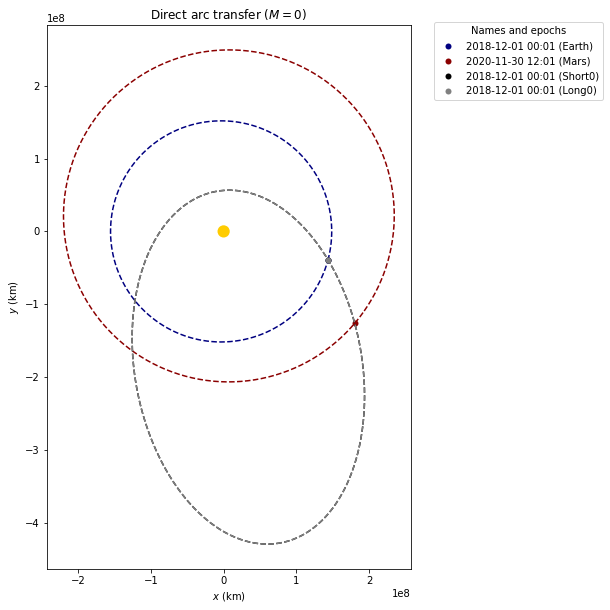

In [4]:
# Solving for direct (M=0) transfer long and short arcs
ss_short0, ss_long0 = lambert_transfer(ss_earth, ss_mars, revs=0)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=0$)")

orbit_set = {ss_earth: ["Earth", "navy"],
            ss_mars: ["Mars", "darkred"],
            ss_short0: ["Short0", "black"],
            ss_long0: ["Long0", "grey"]}

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1])

### Solutions for M=1

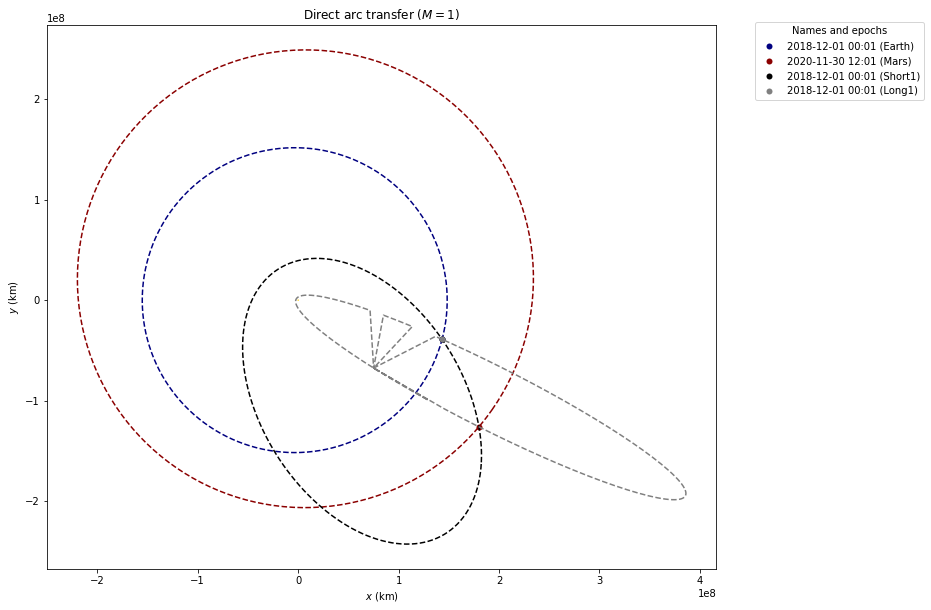

In [5]:
# Solving for M=1 long and short arc transfers
ss_short1, ss_long1 = lambert_transfer(ss_earth, ss_mars, revs=1)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=1$)")

orbit_set = {ss_earth: ["Earth", "navy"],
            ss_mars: ["Mars", "darkred"],
            ss_short1: ["Short1", "black"],
            ss_long1: ["Long1", "grey"]}

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1])

### Solutions for M=2

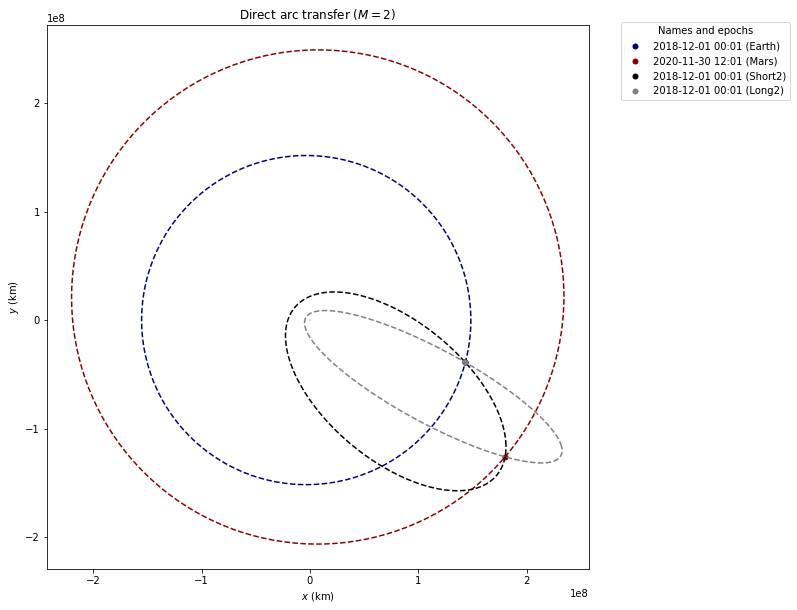

In [6]:
# Solving for M=2 long and short transfer arcs
ss_short2, ss_long2 = lambert_transfer(ss_earth, ss_mars, revs=2)

fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ax.set_title("Direct arc transfer ($M=2$)")

orbit_set = {ss_earth: ["Earth", "navy"],
            ss_mars: ["Mars", "darkred"],
            ss_short2: ["Short2", "black"],
            ss_long2: ["Long2", "grey"]}

for ss in orbit_set:
    op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][-1])

We will plot now all the arc transfers just to better see the difference between them.

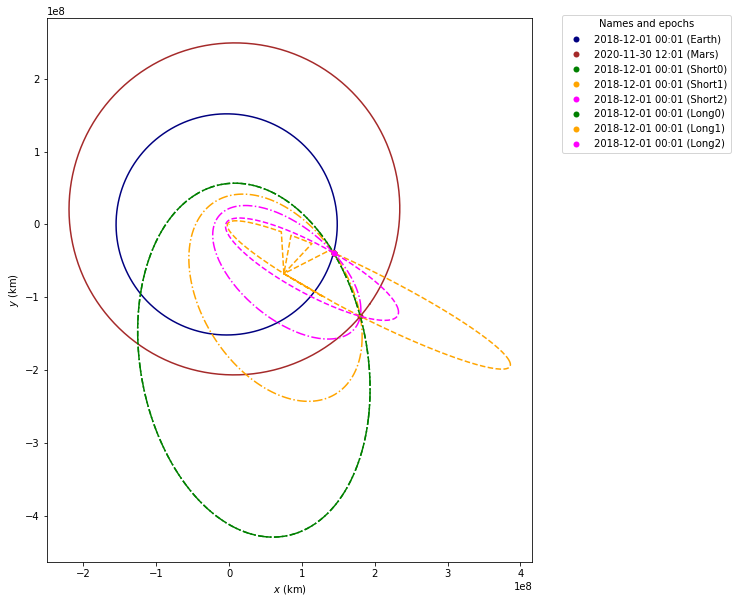

In [7]:
# Plot all solutions together
fig, ax = plt.subplots(figsize=(5,10))
op = StaticOrbitPlotter(ax=ax)
ss_lines = []

orbit_set = {ss_earth: ["Earth", "navy", "-"],
            ss_mars: ["Mars", "brown", "-"],
            ss_short0: ["Short0", "green", "-."],
            ss_short1: ["Short1", "orange", "-."],
            ss_short2: ["Short2", "magenta", "-."],
            ss_long0: ["Long0", "green", "--"],
            ss_long1: ["Long1", "orange", "--"],
            ss_long2: ["Long2", "magenta", "--"],
            }

for ss in orbit_set:
    lines = op.plot(ss, label=orbit_set[ss][0], color=orbit_set[ss][1])
    lines[0].set_linestyle(orbit_set[ss][-1])